In [2]:
!pip install pandas matplotlib numpy nltk seaborn scikit-learn gensim pyldavis wordcloud textblob spacy textstat

###  Dataset Overview

We begin by loading a dataset of radiology reports for exploratory data analysis.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
reports= pd.read_csv('data/open_ave_data.csv')

print(reports.shape)
reports.head(15)

(954, 6)


,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Cough. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...,IMPRESSION: Normal 2-view chest radiography.
1,1,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...,IMPRESSION: No acute cardiopulmonary abnormali...
2,2,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: CHEST PAIN. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...,IMPRESSION: No acute cardiopulmonary process.
3,3,Exam: - CHEST-PORTABLE History: Chest pain Com...,Findings: Heart size appears normal. Lungs cle...,History: Chest pain \n\n,Exam: - CHEST-PORTABLE\n\nComparison: None,Impression: Lungs clear
4,4,EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,"CLINICAL HISTORY: CHEST PAIN, SHORTNESS OF BRE...",EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...,IMPRESSION: Normal single view chest.
5,5,EXAM: CHEST RADIOGRAPHY EXAM DATE: 08/11/2021 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 08/11/2021 ...,IMPRESSION: Normal single view chest.
6,6,Exam: XR CHEST AP OR PA ONLY INDICATION: Respi...,FINDINGS: Stable support devices. Stable heart...,INDICATION: Respiratory distress or failure re...,Exam: XR CHEST AP OR PA ONLY\n\nTECHNIQUE: AP ...,IMPRESSION: Slightly decreased lung volumes.
7,7,Exam: CR CHEST 2 VIEWS History: ACUTE BRONCHIT...,Findings: 2 views. Heart size appears normal. ...,History: ACUTE BRONCHITIS Views of the chest \n\n,Exam: CR CHEST 2 VIEWS\n\nComparison: None,Impression: Lungs clear. Electronically Signed...
8,8,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/27/2019 ...,FINDINGS: Lungs/Pleura: No focal opacities evi...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/27/2019 ...,IMPRESSION: Normal 2-view chest radiography.
9,9,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/22/2020 ...,FINDINGS: The mediastinal and cardiac silhouet...,CLINICAL HISTORY: Chest pain. \n\n,EXAM: CHEST RADIOGRAPHY EXAM DATE: 10/22/2020 ...,IMPRESSION: Clear lungs.


The dataset contains **954 entries and 6 columns**, including the full report text and its structured components: `findings`, `clinicaldata`, `exam name`, and `impression`. This layout provides both unstructured and semi-structured data, making it suitable for training models to segment and extract medical information from free-text reports.


### Character Count Distribution in ReportText

To begin our text statistics analysis, we examine the distribution of character counts across the `ReportText` column. This helps us understand the typical length of radiology reports and spot any significant outliers.

<Axes: >

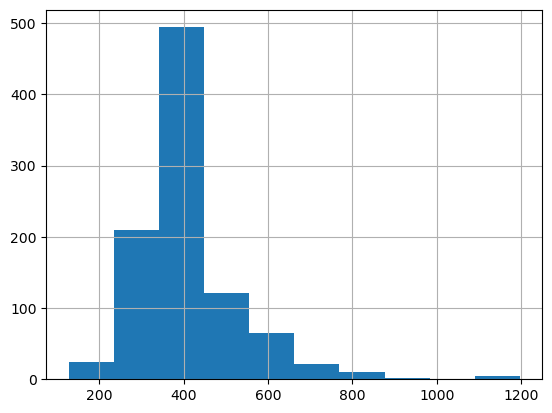

In [5]:
reports['ReportText'].str.len().hist()

The histogram above shows that most reports have a character length clustered between **300 and 500 characters**, with a sharp peak around 400. A few reports are significantly longer, extending beyond 1000 characters.

This insight is useful for setting preprocessing thresholds or sequence length limits if we plan to feed this data into NLP models.


### Word Count Distribution in ReportText

Next, we move on to data exploration at the word level. We plot the number of words appearing in each radiology report to better understand the textual density and verbosity of the documents.


<Axes: >

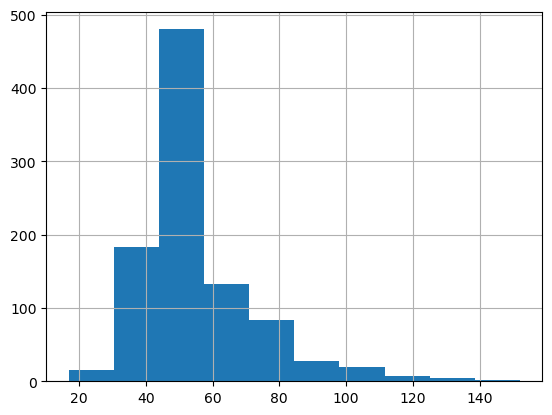

In [6]:
reports['ReportText'].str.split().map(lambda x: len(x)).hist()

The histogram shows that most reports contain between **40 and 80 words**, with a central tendency around 50. This suggests the reports are relatively concise, often summarizing findings in a brief yet standardized format.

This distribution insight helps in preparing tokenization strategies and setting appropriate maximum sequence lengths when training NLP models.


### Average Word Length in ReportText

We now analyze the average word length across each radiology report. This gives insight into the lexical complexity of the text and helps assess whether the vocabulary is more technical or simplified.


<Axes: >

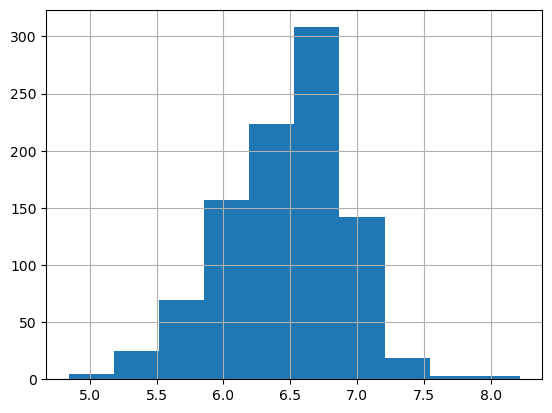

In [7]:
reports['ReportText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The histogram reveals that most reports contain words with an average length between **6 and 7 characters**, suggesting a predominance of moderately long medical terminology. The distribution is slightly left-skewed, which could be influenced by the frequent appearance of short functional words like articles and prepositions.


### Most Frequent Stopwords

To understand what may be contributing to shorter average word lengths, we examine the most common stopwords—words that are generally frequent but carry limited semantic weight (e.g., "is", "the", "and").



In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop = set(stopwords.words('english'))

<BarContainer object of 10 artists>

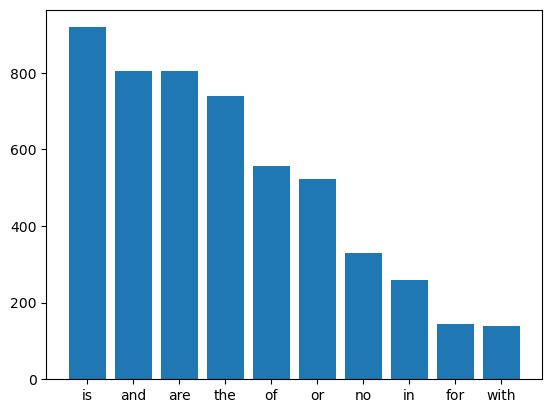

In [10]:
corpus=[]
report= reports['ReportText'].str.split()
report=report.values.tolist()
corpus=[word for i in report for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

Using a bar chart, we observe that the top stopwords in this dataset include **"is", "and", "are", "the", "of"**, etc. These words are often very short and may bias the average word length downward.

This step is important for identifying which tokens should be considered for removal or special treatment during preprocessing, especially if we're planning to train models on informative content rather than syntactic fillers.


### Most Frequent Non-Stopwords

After filtering out common stopwords, we now inspect the most frequently occurring informative words in the radiology reports. This step helps uncover domain-specific vocabulary and repeated patterns that characterize the dataset.


In [11]:
from collections import Counter
import seaborn as sns

<Axes: >

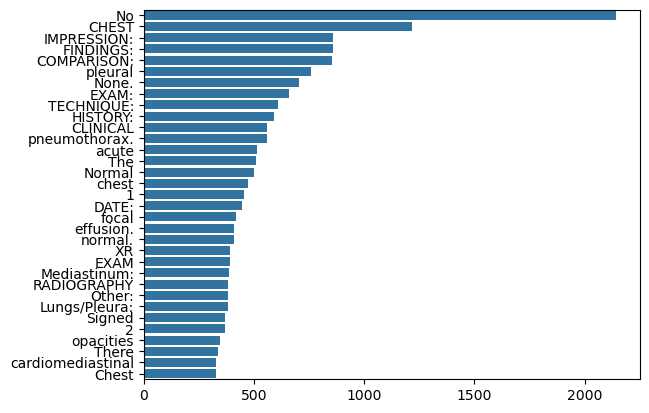

In [12]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

Using Python's `collections.Counter`, we find that terms like **"No"**, **"CHEST"**, **"IMPRESSION:"**, **"FINDINGS:"**, and **"pleural"** appear frequently. Many of these are radiological section headers or key anatomical/diagnostic terms.

This highlights the structured and repetitive nature of the report formatting, which is valuable when designing rule-based or supervised learning approaches for medical text segmentation or classification.


### Bigram Analysis: Most Common Word Pairs

To gain better insights into contextual patterns in the reports, we explore **bigrams**, which are pairs of consecutive words appearing together. This helps reveal common medical phrases or formatting structures that appear frequently in radiology narratives.



In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

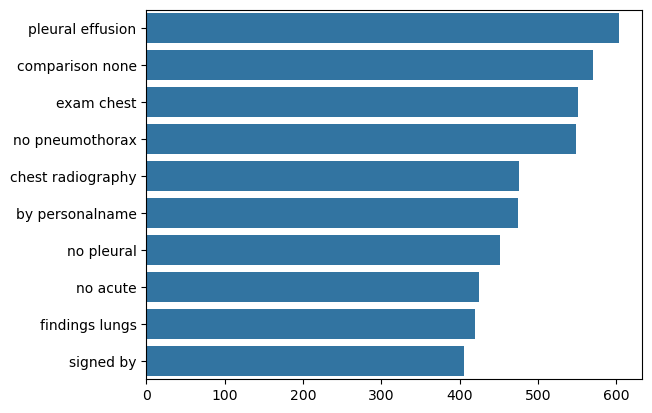

In [14]:
top_n_bigrams=get_top_ngram(reports['ReportText'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

The most frequent bigrams include phrases such as:
- **"pleural effusion"**
- **"comparison none"**
- **"exam chest"**
- **"no pneumothorax"**
- **"chest radiography"**

These word pairs highlight clinically relevant terminology and typical sentence structures used by radiologists. Such findings are helpful when designing tokenizers or phrase-based extraction techniques, and can improve downstream NLP tasks like classification, summarization, or information retrieval.

### Trigram Analysis: Most Common 3-Word Sequences

Following bigrams, we now examine **trigrams**, or sequences of three consecutive words. This offers deeper insight into structured phrasing and repeated patterns within the reports, especially in medical documentation where expressions tend to be formulaic.


<Axes: >

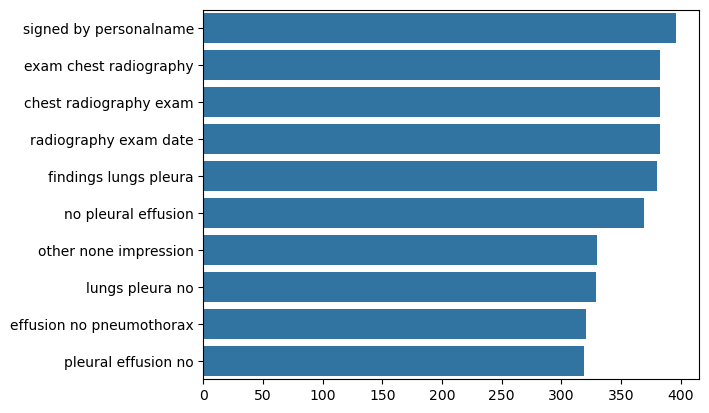

In [15]:
top_tri_grams=get_top_ngram(reports['ReportText'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

Among the most frequent trigrams, we observe:
- **"signed by personalname"**
- **"exam chest radiography"**
- **"radiography exam date"**
- **"findings lungs pleura"**
- **"no pleural effusion"**

These trigrams further confirm the presence of templated report structures and highlight medically significant terminology, which can be leveraged for building robust language models or rule-based parsing systems tailored for radiology data.


### Topic Modeling with Latent Dirichlet Allocation (LDA)

We apply **unsupervised topic modeling** using Latent Dirichlet Allocation (LDA) to uncover the main themes present in the radiology reports.

Before training the model, we perform the following preprocessing steps:
- **Tokenization**: splitting each report into individual tokens.
- **Stopword removal**: eliminating high-frequency but low-information words.
- **Lemmatization**: reducing words to their root forms.
- **Bag-of-words conversion**: representing each document as a frequency distribution of tokens.




In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_reports(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for reports in df['ReportText']:
        words=[w for w in word_tokenize(reports) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_reports(reports)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m19ya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:

import gensim


dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.039*"CHEST" + 0.033*"EXAM" + 0.026*"IMPRESSION" + 0.026*"FINDINGS" + 0.026*"None" + 0.026*"COMPARISON" + 0.025*"view" + 0.025*"normal" + 0.022*"effusion" + 0.022*"pleural"'),
 (1,
  '0.023*"acute" + 0.022*"PERSONALNAME" + 0.020*"The" + 0.019*"chest" + 0.018*"There" + 0.018*"CHEST" + 0.017*"Dictated" + 0.015*"date/time" + 0.014*"Electronically" + 0.014*"normal"'),
 (2,
  '0.043*"Normal" + 0.018*"visible" + 0.015*"abnormality" + 0.015*"pulmonary" + 0.012*"fracture" + 0.011*"Unremarkable" + 0.011*"mass" + 0.010*"effusion" + 0.009*"adenopathy" + 0.009*"pleural"'),
 (3,
  '0.045*"EXAM" + 0.040*"None" + 0.038*"Normal" + 0.030*"CHEST" + 0.025*"TECHNIQUE" + 0.024*"HISTORY" + 0.024*"IMPRESSION" + 0.024*"FINDINGS" + 0.024*"COMPARISON" + 0.023*"view"')]

Using `gensim`’s `LdaMulticore`, we train an LDA model with 4 topics. Below are the top words associated with each discovered topic:

- **Topic 0**: CHEST, FINDINGS, pneumothorax, COMPARISON, IMPRESSION, pleural  
  → Likely reflects structured report sections and diagnostic keywords.
  
- **Topic 1**: EXAM, None, CHEST, view, Normal, RADIOGRAPHY  
  → Captures imaging technique and findings context.
  
- **Topic 2**: The, acute, normal, PERSONALNAME, chest  
  → Mixed content with signs of templated wording and generic descriptors.
  
- **Topic 3**: CHEST, Normal, Exam, Comparison, History  
  → Suggests repeated headers and typical exam summaries.

This step helps us explore latent patterns in the dataset and better understand how radiologists structure and phrase their reports, which can inform downstream classification or clustering tasks.

### Visualizing Topics with pyLDAvis

While LDA allows us to extract topics numerically, it’s often helpful to visualize the topic distribution for easier interpretation. We use **pyLDAvis**, a powerful tool for interactively visualizing topic models.

In [19]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.124363 -0.019866       1        1  44.261955
1     -0.028913 -0.176252       2        1  38.003080
3      0.136166  0.116370       3        1  14.925032
2     -0.231616  0.079748       4        1   2.809933, topic_info=           Term        Freq        Total Category  logprob  loglift
16       Normal  504.000000   504.000000  Default  30.0000  30.0000
8          EXAM  965.000000   965.000000  Default  29.0000  29.0000
15         None  830.000000   830.000000  Default  28.0000  28.0000
144   pulmonary  211.000000   211.000000  Default  27.0000  27.0000
4      CLINICAL  507.000000   507.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
9      FINDINGS    8.800293   798.364438   Topic4  -4.8402  -0.9358
5    COMPARISON    8.756557   794.063554   Topic4  -4.8452  -0.9354
132  silhouette    7.795251   180.512982   Topic4  -4.9615   0.4297
3         CHEST    8.318550  1137.923975   Topic4  -4.8965  -1.3465
15         None    8.116406   830.230465   Topic4  -4.9211  -1.0558

[281 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1131      1  0.275845         01:13
1131      3  0.827536         01:13
1752      3  0.826534    02/16/2019
932       3  0.827931    03/04/2020
1841      3  0.736196    05/03/2015
...     ...       ...           ...
361       2  0.030792          week
361       3  0.030792          week
361       4  0.030792          week
1443      1  0.860105  well-aerated
1370      4  0.644663       wording

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

The left-hand plot shows the relative importance and separation of topics in a 2D space based on principal component analysis (PCA). Each circle represents a topic, and its size corresponds to its overall prevalence in the corpus.

The right-hand bar chart displays the top contributing terms for a selected topic, ranked by relevance. These terms help us understand the semantic content of each topic more intuitively.

This visualization aids in:
- Assessing topic overlap or separation,
- Identifying dominant or rare topics,
- Interpreting the linguistic makeup of each topic cluster.

Overall, pyLDAvis offers a meaningful bridge between abstract topic distributions and concrete human understanding.


### Word Cloud Representation

A word cloud offers a quick and intuitive way to visualize the most frequent terms in the corpus. The **size** and **color** of each word reflect its frequency, with larger and bolder words appearing more often in the dataset.


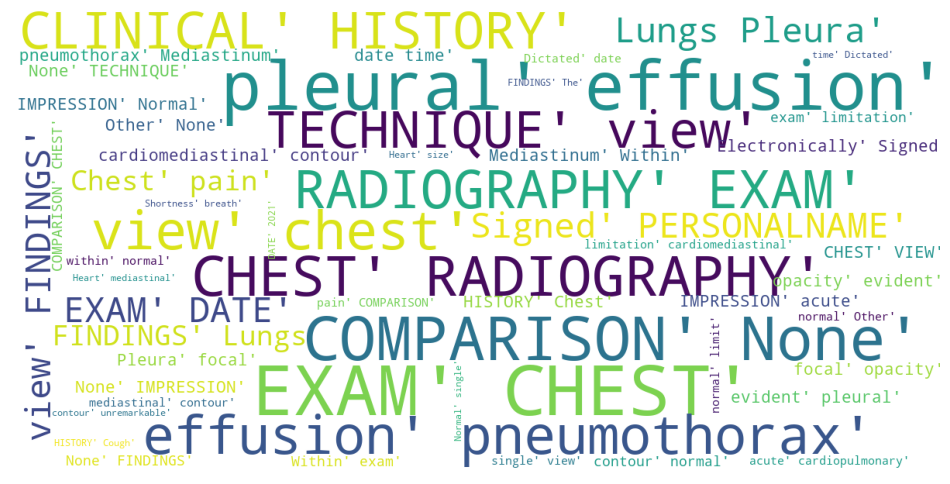

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)


In the word cloud above, common terms like **"effusion"**, **"CHEST"**, **"EXAM"**, **"pleural"**, and **"RADIOGRAPHY"** stand out prominently. These highlight key themes and recurring structures typical in radiology reports.

This visual reinforces earlier findings from frequency analysis and topic modeling, while providing an engaging summary of the report vocabulary. It's a useful exploratory tool for gaining a high-level overview of the dataset before diving into more detailed NLP modeling.


### POS Tag Distribution Analysis

To explore the linguistic structure of the radiology reports, we performed Part-of-Speech (POS) tagging using `nltk`. This allows us to analyze the grammatical roles of words across all texts.


<Axes: >

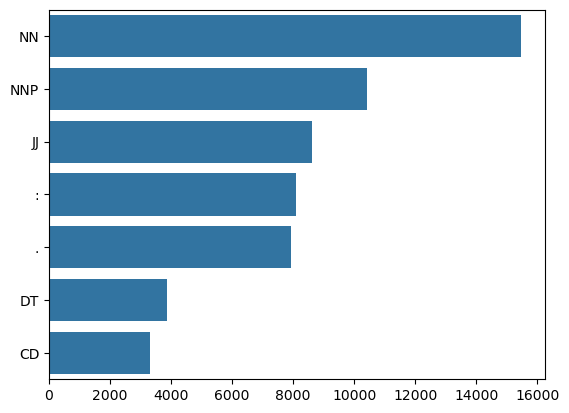

In [25]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=reports['ReportText'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

The bar chart above shows the top 7 most frequent POS tags in the dataset:

- **NN** (Common noun): Most dominant tag, reflecting the technical and object-focused language used in clinical descriptions.
- **NNP** (Proper noun): Indicates anatomical or formal labels, such as "Mediastinum", "Heart", or system identifiers.
- **JJ** (Adjective): Used to describe observations, including terms like *acute*, *normal*, or *unremarkable*.
- **:** and **.** (Punctuation): Highlights the structured formatting style common in radiology documentation.
- **DT** (Determiner) and **CD** (Cardinal number): Appear in measurements, references to findings, and report timestamps.

This analysis reinforces that radiology reports are highly structured and rely heavily on nouns and descriptive terms, making them suitable for rule-based extraction and downstream NLP tasks such as phrase grouping or clinical entity recognition.


## Readability Analysis: How Easy Is It to Read Radiology Reports?

To better understand the complexity of the radiology reports, we assessed their readability using the **Flesch Reading Ease (FRE)** score. This metric evaluates how easy a text is to read by analyzing sentence length and word complexity (measured through syllables).

The FRE score typically ranges as follows:
- **0–30**: Very difficult to read (college level)
- **50–60**: Fairly difficult (10th–12th grade)
- **60–70+**: Easily understandable by 8th graders or younger



<Axes: >

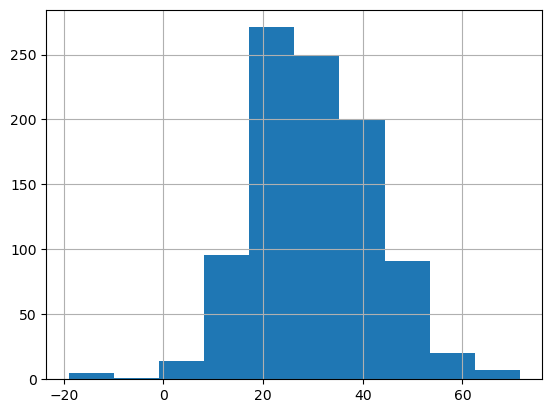

In [26]:
from textstat import flesch_reading_ease

reports['ReportText'].apply(lambda x : flesch_reading_ease(x)).hist()

### Distribution of FRE Scores

The histogram below shows the distribution of Flesch Reading Ease scores across all the reports:

- Most reports scored between **20 and 40**, indicating they are **quite technical and dense**—expected for medical language.
- Very few reports reached the 60+ range, meaning **almost none are easily readable by a general audience**.

This confirms the professional and specialized nature of radiology documentation, which may necessitate simplification or summarization if intended for patient-facing communication.


### Identifying Extremely Hard-to-Read Reports

While most reports cluster within a moderate readability range, it's interesting to highlight the outliers—those with very low Flesch Reading Ease scores. These texts might contain highly technical, dense language or unusual formatting. Exploring these outliers can offer insights into edge cases or quality issues in the dataset.


In [27]:



# Compute FRE scores
reports['flesch_score'] = reports['ReportText'].apply(flesch_reading_ease)

# Filter reports with extremely low readability
hard_reports = reports[reports['flesch_score'] < 0]

# Show a few examples
hard_reports[['ReportText', 'flesch_score']].head()


,ReportText,flesch_score
98,CHEST 1 VIEW INDICATION / CLINICAL INFORMATION...,-17.989315
243,EXAM: XR CHEST 2 VW HISTORY: Cough TECHNIQUE: ...,-15.237143
254,Exam: CHEST AP (1 VIEW) History: DYSPNEA Compa...,-0.143656
304,EXAM: XR CHEST 2 VW HISTORY: Cough TECHNIQUE: ...,-15.534000
344,Exam: CHEST AP (1 VIEW) History: DIFF BREATHIN...,-3.727157


One report in the dataset received a Flesch Reading Ease score of approximately **-18**, which indicates it is *extremely difficult to read*. This report includes dense medical terminology, fragmented formatting, and lacks natural sentence flow, which likely contributed to its low score.

## Other ways to visualize data

### Keyword Frequency Across Report Lengths

To explore how vocabulary usage shifts with the length of radiology reports, we bucketed the data into three categories based on word count:  
- **Short** reports: fewer than 50 words  
- **Medium** reports: 50–100 words  
- **Long** reports: more than 100 words

We then computed the total frequency of key medical terms within each group and visualized the results in the heatmap above.


C:\Users\m19ya\AppData\Local\Temp\ipykernel_6016\1635387676.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  freq_matrix = pd.DataFrame(index=keywords, columns=['Short', 'Medium', 'Long']).fillna(0)


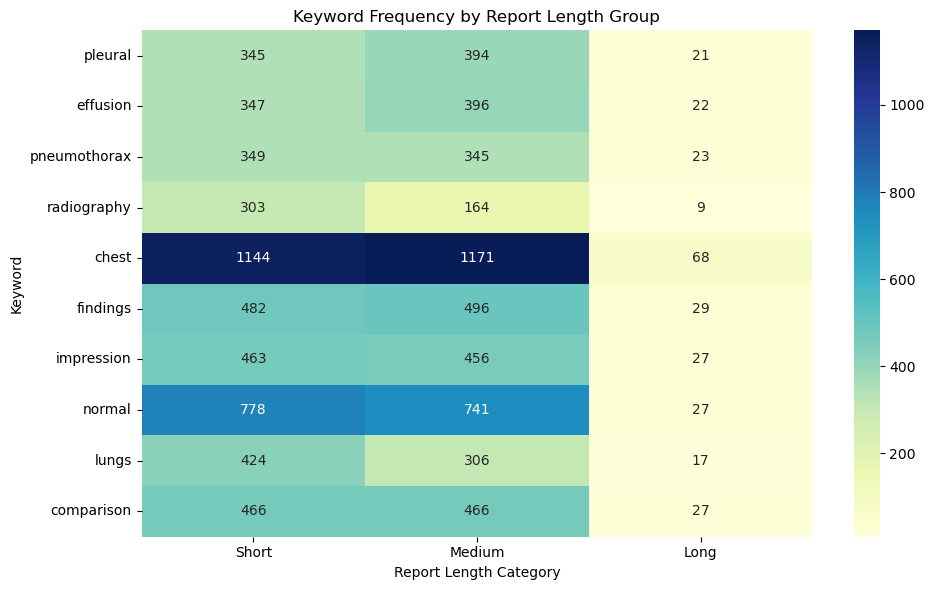

In [21]:
reports['word_count'] = reports['ReportText'].str.split().apply(len)

#report length categories
def length_bucket(count):
    if count < 50:
        return 'Short'
    elif count <= 100:
        return 'Medium'
    else:
        return 'Long'

reports['length_group'] = reports['word_count'].apply(length_bucket)

#keywords to track
keywords = ['pleural', 'effusion', 'pneumothorax', 'radiography', 'chest', 
            'findings', 'impression', 'normal', 'lungs', 'comparison']

#frequency matrix: rows = keywords, columns = length group
freq_matrix = pd.DataFrame(index=keywords, columns=['Short', 'Medium', 'Long']).fillna(0)

for group in ['Short', 'Medium', 'Long']:
    subset = reports[reports['length_group'] == group]['ReportText'].str.lower()
    for kw in keywords:
        freq = subset.str.count(kw).sum()
        freq_matrix.loc[kw, group] = freq

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.astype(int), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Keyword Frequency by Report Length Group")
plt.xlabel("Report Length Category")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


#### Observations:
- Words like **"chest"**, **"normal"**, and **"findings"** appear heavily across **short and medium** reports, suggesting they are part of standard templates or summaries.
- **Long reports** show significantly lower keyword frequency overall. This may be due to greater lexical diversity or verbosity not captured by a fixed keyword list.
- Terms like **"effusion"**, **"pleural"**, and **"pneumothorax"** maintain similar counts in short and medium reports but drop in long reports — likely reflecting that long reports are not just repetitions of typical phrases, but richer in variety.

This visualization helps identify which types of content dominate short vs. long diagnostic narratives, and could inform future strategies for report classification or compression.


### Semantic Relationships Between Words (Embedding Visualization)

To explore how frequently used medical terms relate to each other semantically, we projected their word embeddings into a 2D space using PCA. Each point represents a word, and proximity between points indicates similar usage patterns in the language model’s vector space.



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


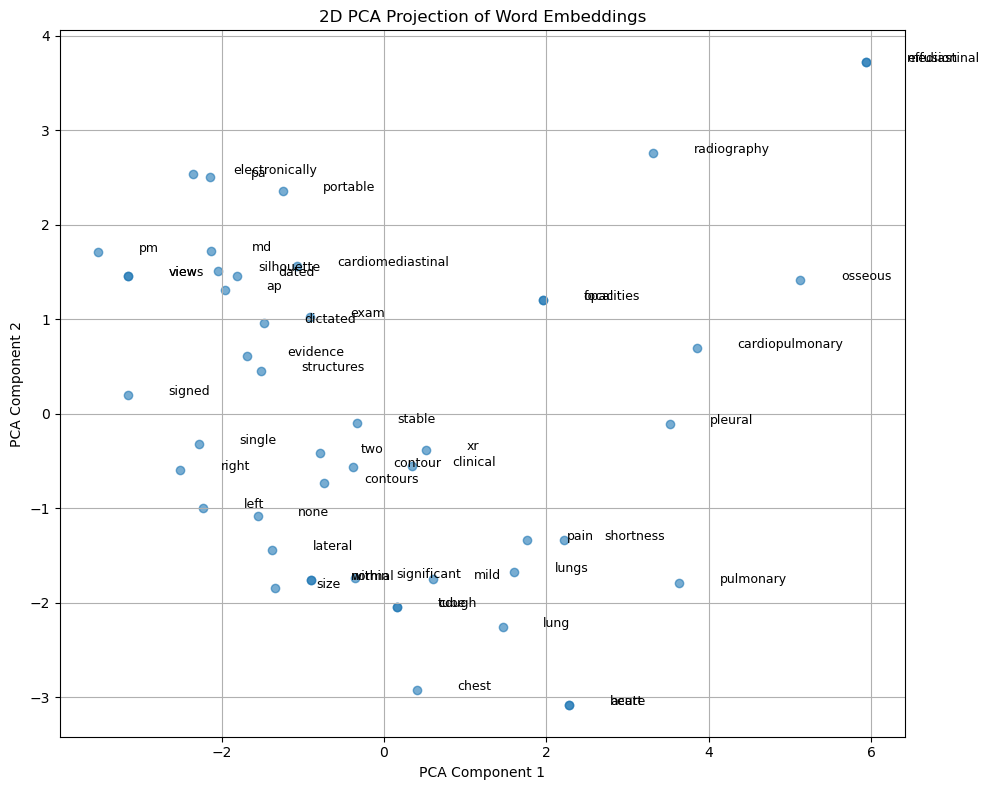

In [23]:
import spacy
from sklearn.decomposition import PCA

# Download the model if not already present
import spacy.cli
spacy.cli.download("en_core_web_md")

nlp = spacy.load("en_core_web_md")


corpus_words = " ".join(reports["ReportText"].astype(str).str.lower()).split()
freq_words = [word for word, _ in Counter(corpus_words).most_common(300) if word.isalpha() and word not in stop]
top_words = freq_words[:50]

# embeddings
embeddings = [nlp(word).vector for word in top_words]

# Dimensionality reduction
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.6)

for i, word in enumerate(top_words):
    plt.text(reduced[i, 0] + 0.5, reduced[i, 1], word, fontsize=9)

plt.title("2D PCA Projection of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Observations:
- **Anatomical terms** such as *"lungs"*, *"chest"*, *"pleural"*, and *"cardiopulmonary"* appear near each other, forming a loose semantic cluster.
- Words related to **report structure or formatting** (e.g., *"electronically"*, *"views"*, *"dictated"*, *"exam"*) are grouped toward the upper-left, indicating a different usage context from clinical findings.
- **Findings-related terms** like *"opacities"*, *"effusion"*, and *"osseous"* are more spread out, showing greater variation in how they co-occur with other terms.

This type of visualization helps reveal **latent patterns in terminology usage** and can guide the design of domain-specific ontologies or improve token-level preprocessing for downstream NLP models.
